# Capstone - Delivery-4
This dataset is part of the [Farming Systems Project](https://www.ars.usda.gov/northeast-area/beltsville-md-barc/beltsville-agricultural-research-center/sustainable-agricultural-systems-laboratory/docs/farming-systems-project/) at USDA, Beltsville MD.  This data is not available online on the USDA
 website but can be found on my [GitHub](https://github.com/mmtokay/DATA606/tree/master/dataset)
* Julian Day 
* Month
* Day
* Date
* avgtTempC - average temperature in C
* maxTempC - maximum temperature in C
* minTempC - minimum temperature in C
* maxHumPct - maximum humidity in %
* minHumPct - minimum humidity in %
* avgRadWm-2 - average radiation in w/m2
* meanWindMs-1 - mean wind in m/s
* PrecipitationMm - precipitation/snow me# Model A

In [1]:
# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-0obz1b_l
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-0obz1b_l
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0614b609854294e27c35c8eda36fc1b263b6cb3d4_-cp36-none-any.whl size=100462 sha256=6e52f810a88c5eac6a6a16f38849bcc80097201937d94bcc171fdc61dfbd14fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-huzhfrnp/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [2]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import warnings
import time
import pathlib
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from datetime import datetime, timedelta
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler, Normalizer, MinMaxScaler, StandardScaler, Binarizer
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.utils import shuffle
from time import time
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
drive.mount('/content/drive')

print(tf.__version__)
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
2.2.0-rc4


In [0]:
def modelEvaluation(test_y, y_pred):
    # Mean absolute error regression loss (Best is 0)
    mae = mean_absolute_error(test_y, y_pred)
    print("Mean absolute error regression loss (Best is 0) = {:.5f}".format(mae))
    
    # Mean squared error
    mse = mean_squared_error(test_y, y_pred)
    print("Mean squared error (Best is 0) = {:.5f}".format(mse))
    
    # Median absolute error regression loss
    maerl = median_absolute_error(test_y, y_pred)
    print("Median absolute error regression loss or Mean absolute percentage error (Best is 0) = {:.5f}".format(maerl))
    
    # Coefficient of determination (Best is 1)
    r2 = r2_score(y_pred, test_y)
    print("Coefficient of determination (Best is 1) = {:.5f}".format(r2))

    a = plt.axes(aspect='equal')
    plt.scatter(test_y, y_pred)
    plt.xlabel('True Values [GrainYield]')
    plt.ylabel('Predictions [GrainYield]')
    lims = [0, 5500]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

def errorPlot(test_y, y_pred):
    error = y_pred - test_y
    plt.hist(error, bins = 25)
    plt.xlabel("Prediction Error [GrainYield]")
    _ = plt.ylabel("Count")

# Soybean - 15 weeks

In [4]:
dataSoy15w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/soyFeatures15w.csv')
corrSoy15w = dataSoy15w.corr()
corrSoy15w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_15w_X, test_15w_X = train_test_split(dataSoy15w.drop('GrainYield', axis=1), random_state=1)
train_15w_y, test_15w_y = train_test_split(dataSoy15w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_15w_X = scaler.fit_transform(train_15w_X)
test_scaler_15w_X = scaler.transform(test_15w_X)

**Lasso**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31199950.41225622, tolerance: 46442.09510619733
  positive)


Mean absolute error regression loss (Best is 0) = 388.31512
Mean squared error (Best is 0) = 254287.60039
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 288.52153
Coefficient of determination (Best is 1) = 0.80498
minHum13          919.434115
Precip10          497.817233
maxTemp2          477.803561
SystemNameType    322.955445
minTemp7          318.677373
dtype: float64
minHum4     -290.736069
maxTemp15   -299.093436
minHum8     -303.839983
maxHum1     -470.917067
maxTemp7    -757.660521
dtype: float64


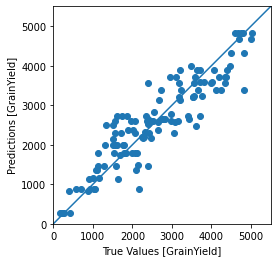

In [6]:
lm = linear_model.Lasso(alpha=0.4)
lm.fit(train_scaler_15w_X,train_15w_y)
y_pred_15w_lm = lm.predict(test_scaler_15w_X)
modelEvaluation(test_15w_y, y_pred_15w_lm)

important_features = pd.Series(data=lm.coef_,index=dataSoy15w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

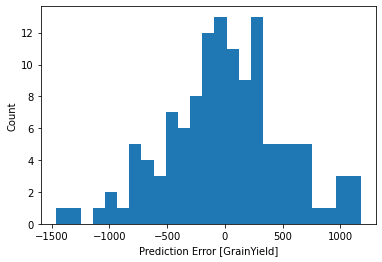

In [7]:
errorPlot(test_15w_y, y_pred_15w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 363.74478
Mean squared error (Best is 0) = 226622.67057
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 267.07778
Coefficient of determination (Best is 1) = 0.83165
minHum13          919.434115
Precip10          497.817233
maxTemp2          477.803561
SystemNameType    322.955445
minTemp7          318.677373
dtype: float64
minHum4     -290.736069
maxTemp15   -299.093436
minHum8     -303.839983
maxHum1     -470.917067
maxTemp7    -757.660521
dtype: float64


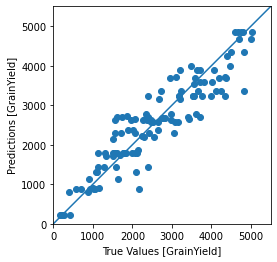

In [8]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_15w_X,train_15w_y)
y_pred_15w_dtr = tree_model.predict(test_scaler_15w_X)
modelEvaluation(test_15w_y, y_pred_15w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataSoy15w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

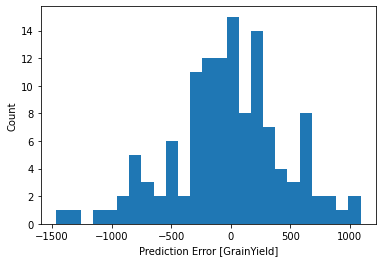

In [9]:
errorPlot(test_15w_y, y_pred_15w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 366.31824
Mean squared error (Best is 0) = 234502.45757
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 271.16160
Coefficient of determination (Best is 1) = 0.82546
minTemp12    0.470910
maxTemp7     0.098688
minTemp5     0.089567
Precip10     0.035950
minTemp1     0.026739
dtype: float64


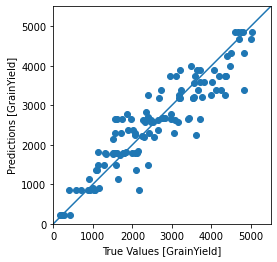

In [10]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_15w_X,train_15w_y)
y_pred_15w_rfr = rf_model.predict(test_scaler_15w_X)
modelEvaluation(test_15w_y, y_pred_15w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataSoy15w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

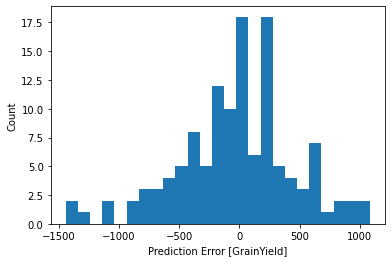

In [11]:
errorPlot(test_15w_y, y_pred_15w_rfr)

Mean absolute error regression loss (Best is 0) = 361.88109
Mean squared error (Best is 0) = 228000.08596
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 261.09448
Coefficient of determination (Best is 1) = 0.83036
minTemp12    0.465640
maxTemp7     0.106060
minTemp5     0.088009
Precip10     0.042060
minTemp1     0.027329
dtype: float64


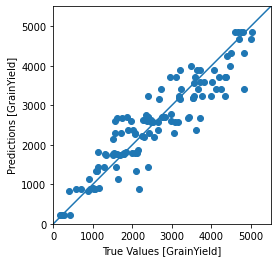

In [12]:
max_depth = 30
n_est = 400
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_15w_X,train_15w_y)
y_pred_15w_rfrc = rf_model.predict(test_scaler_15w_X)
modelEvaluation(test_15w_y, y_pred_15w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataSoy15w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

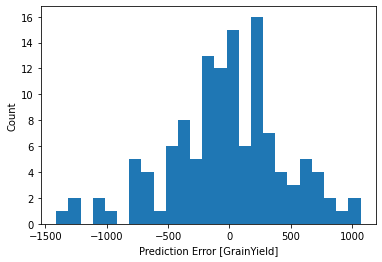

In [13]:
errorPlot(test_15w_y, y_pred_15w_rfrc)

**Neural Network**

***Build the model***


Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_15w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               13824     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                5

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [17]:
EPOCHS = 200
history = model.fit(train_scaler_15w_X, train_15w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8607636.0000,  mae:2705.9421,  mse:8607636.0000,  val_loss:7636278.5000,  val_mae:2575.3955,  val_mse:7636278.5000,  
....................................................................................................
Epoch: 100, loss:199331.6562,  mae:343.2629,  mse:199331.6562,  val_loss:307797.3125,  val_mae:429.1915,  val_mse:307797.3125,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

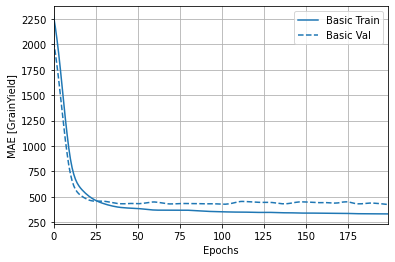

In [19]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

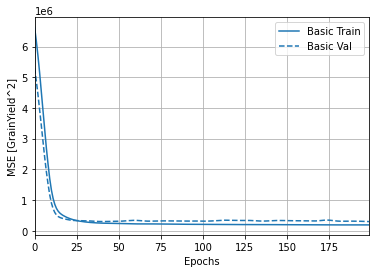

In [20]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [21]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
early_history = model.fit(train_scaler_15w_X, train_15w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8617770.0000,  mae:2707.4282,  mse:8617770.0000,  val_loss:7673095.0000,  val_mae:2581.0632,  val_mse:7673095.0000,  
...................................................

Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.

In [22]:
loss, mae, mse = model.evaluate(test_scaler_15w_X, test_15w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

4/4 - 0s - loss: 296404.0625 - mae: 425.8248 - mse: 296404.0625
Testing set Mean Abs Error: 425.82 GrainYield


***Make predictions***

Finally, predict GrainYield values using data in the testing set:

In [0]:
y_pred_15w_nn = model.predict(test_scaler_15w_X).flatten()

It looks like our model predicts reasonably well. Let's take a look at the error distribution.

Mean absolute error regression loss (Best is 0) = 425.82484
Mean squared error (Best is 0) = 296404.05395
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 348.64014
Coefficient of determination (Best is 1) = 0.74017


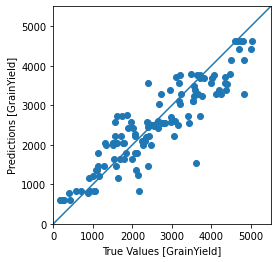

In [24]:
modelEvaluation(test_15w_y, y_pred_15w_nn)

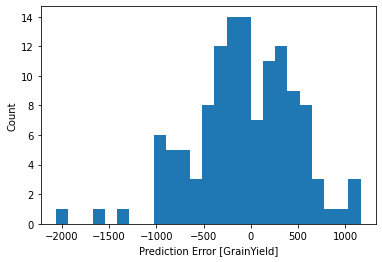

In [25]:
errorPlot(test_15w_y, y_pred_15w_nn)

# Soybean - 14 weeks

In [26]:
dataSoy14w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/soyFeatures14w.csv')
corrSoy14w = dataSoy14w.corr()
corrSoy14w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_14w_X, test_14w_X = train_test_split(dataSoy14w.drop('GrainYield', axis=1), random_state=1)
train_14w_y, test_14w_y = train_test_split(dataSoy14w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_14w_X = scaler.fit_transform(train_14w_X)
test_scaler_14w_X = scaler.transform(test_14w_X)

**Lasso**

Mean absolute error regression loss (Best is 0) = 390.89912
Mean squared error (Best is 0) = 253732.24411
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 287.81818
Coefficient of determination (Best is 1) = 0.80354
minHum13     792.908200
maxTemp2     479.196186
minHum9      474.560664
minTemp13    419.655378
minHum2      403.936166
dtype: float64
minHum8    -262.167214
minHum4    -341.496656
minHum1    -441.646256
maxTemp7   -638.903471
maxHum1    -927.862511
dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27130391.31436772, tolerance: 46442.09510619733
  positive)


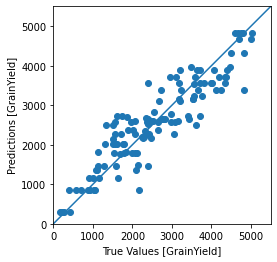

In [28]:
lm = linear_model.Lasso(alpha=0.6)
lm.fit(train_scaler_14w_X,train_14w_y)
y_pred_14w_lm = lm.predict(test_scaler_14w_X)
modelEvaluation(test_14w_y, y_pred_14w_lm)

important_features = pd.Series(data=lm.coef_,index=dataSoy14w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

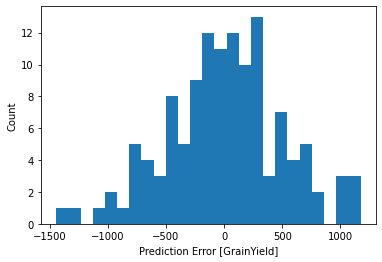

In [29]:
errorPlot(test_14w_y, y_pred_14w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 365.44649
Mean squared error (Best is 0) = 234428.06372
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 262.75000
Coefficient of determination (Best is 1) = 0.82588
minHum13     792.908200
maxTemp2     479.196186
minHum9      474.560664
minTemp13    419.655378
minHum2      403.936166
dtype: float64
minHum8    -262.167214
minHum4    -341.496656
minHum1    -441.646256
maxTemp7   -638.903471
maxHum1    -927.862511
dtype: float64


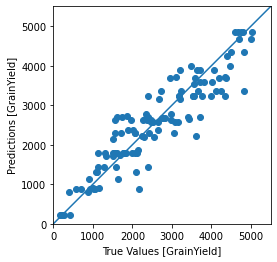

In [30]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_14w_X,train_14w_y)
y_pred_14w_dtr = tree_model.predict(test_scaler_14w_X)
modelEvaluation(test_14w_y, y_pred_14w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataSoy14w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

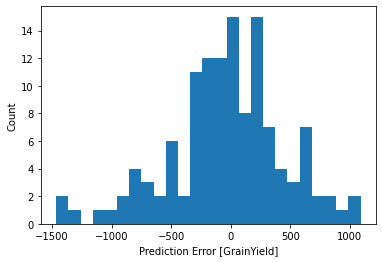

In [31]:
errorPlot(test_14w_y, y_pred_14w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 365.00196
Mean squared error (Best is 0) = 231804.94055
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 266.19952
Coefficient of determination (Best is 1) = 0.82806
minTemp12    0.469193
maxTemp7     0.094789
minTemp5     0.084947
Precip10     0.045358
minTemp1     0.027228
dtype: float64


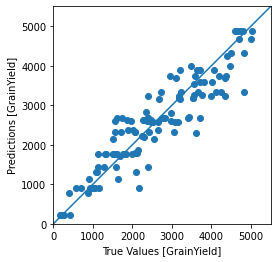

In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_14w_X,train_14w_y)
y_pred_14w_rfr = rf_model.predict(test_scaler_14w_X)
modelEvaluation(test_14w_y, y_pred_14w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataSoy14w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

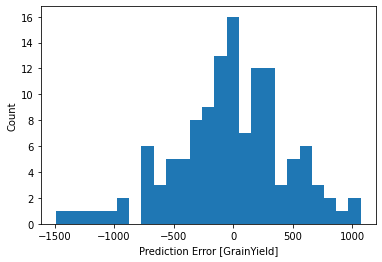

In [33]:
errorPlot(test_14w_y, y_pred_14w_rfr)

Mean absolute error regression loss (Best is 0) = 362.39233
Mean squared error (Best is 0) = 228646.25543
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 261.09448
Coefficient of determination (Best is 1) = 0.82985
minTemp12    0.465248
maxTemp7     0.105932
minTemp5     0.088744
Precip10     0.042733
minTemp1     0.027169
dtype: float64


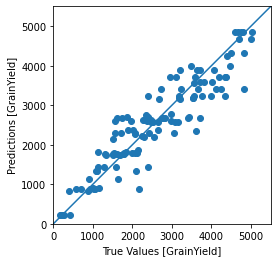

In [34]:
max_depth = 35
n_est = 400
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_14w_X,train_14w_y)
y_pred_14w_rfrc = rf_model.predict(test_scaler_14w_X)
modelEvaluation(test_14w_y, y_pred_14w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataSoy14w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

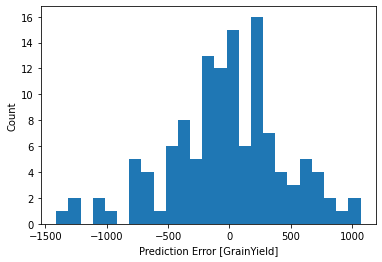

In [35]:
errorPlot(test_14w_y, y_pred_14w_rfrc)

**Neural Network**

***Build the model***


Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_14w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)               

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [39]:
EPOCHS = 200
history = model.fit(train_scaler_14w_X, train_14w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8603018.0000,  mae:2705.0146,  mse:8603018.0000,  val_loss:7602869.0000,  val_mae:2569.9329,  val_mse:7602869.0000,  
....................................................................................................
Epoch: 100, loss:198676.8594,  mae:347.7343,  mse:198676.8594,  val_loss:281210.9688,  val_mae:418.6784,  val_mse:281210.9688,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

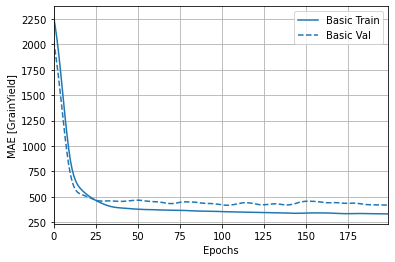

In [41]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

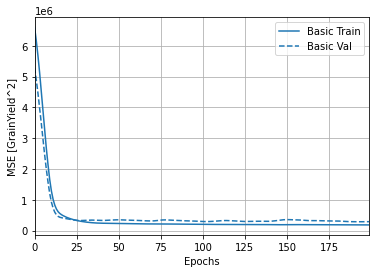

In [42]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [43]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
early_history = model.fit(train_scaler_14w_X, train_14w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8597560.0000,  mae:2704.3345,  mse:8597560.0000,  val_loss:7582399.0000,  val_mae:2567.3650,  val_mse:7582399.0000,  
..................................

In [44]:
loss, mae, mse = model.evaluate(test_scaler_14w_X, test_14w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

4/4 - 0s - loss: 335892.5312 - mae: 454.8924 - mse: 335892.5312
Testing set Mean Abs Error: 454.89 GrainYield


Mean absolute error regression loss (Best is 0) = 454.89238
Mean squared error (Best is 0) = 335892.55087
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 366.74878
Coefficient of determination (Best is 1) = 0.70051


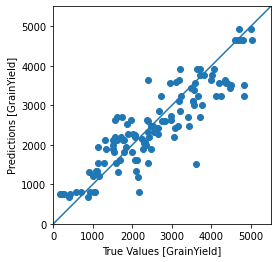

In [45]:
y_pred_14w_nn = model.predict(test_scaler_14w_X).flatten()
modelEvaluation(test_14w_y, y_pred_14w_nn)

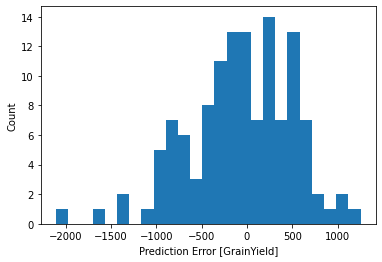

In [46]:
errorPlot(test_14w_y, y_pred_14w_nn)

# Soybean - 13 weeks

In [47]:
dataSoy13w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/soyFeatures13w.csv')
corrSoy13w = dataSoy13w.corr()
corrSoy13w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_13w_X, test_13w_X = train_test_split(dataSoy13w.drop('GrainYield', axis=1), random_state=1)
train_13w_y, test_13w_y = train_test_split(dataSoy13w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_13w_X = scaler.fit_transform(train_13w_X)
test_scaler_13w_X = scaler.transform(test_13w_X)

**Lasso**

Mean absolute error regression loss (Best is 0) = 391.36432
Mean squared error (Best is 0) = 253713.19674
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 292.90546
Coefficient of determination (Best is 1) = 0.80238
minHum13     893.010036
Precip10     449.177080
maxTemp2     446.891224
minTemp13    440.899781
minHum2      405.581615
dtype: float64
minHum4     -254.822548
minHum7     -262.140345
minHum1     -370.096911
maxTemp7    -697.655722
maxHum1    -1028.651866
dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27796066.8788068, tolerance: 46442.09510619733
  positive)


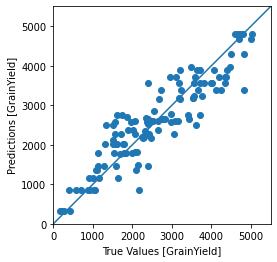

In [49]:
lm = linear_model.Lasso(alpha=0.7)
lm.fit(train_scaler_13w_X,train_13w_y)
y_pred_13w_lm = lm.predict(test_scaler_13w_X)
modelEvaluation(test_13w_y, y_pred_13w_lm)

important_features = pd.Series(data=lm.coef_,index=dataSoy13w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

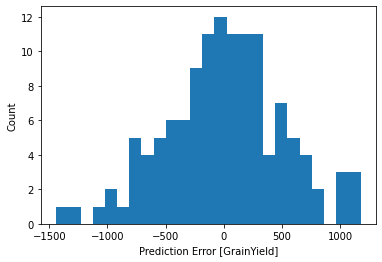

In [50]:
errorPlot(test_13w_y, y_pred_13w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 361.58738
Mean squared error (Best is 0) = 225529.12061
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 262.75000
Coefficient of determination (Best is 1) = 0.83244
minHum13     893.010036
Precip10     449.177080
maxTemp2     446.891224
minTemp13    440.899781
minHum2      405.581615
dtype: float64
minHum4     -254.822548
minHum7     -262.140345
minHum1     -370.096911
maxTemp7    -697.655722
maxHum1    -1028.651866
dtype: float64


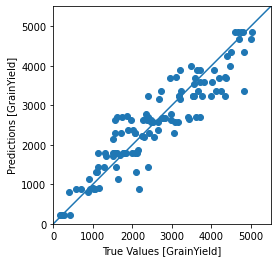

In [51]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_13w_X,train_13w_y)
y_pred_13w_dtr = tree_model.predict(test_scaler_13w_X)
modelEvaluation(test_13w_y, y_pred_13w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataSoy13w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

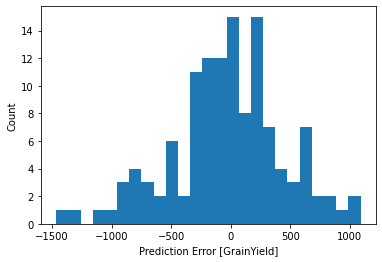

In [52]:
errorPlot(test_13w_y, y_pred_13w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 368.07345
Mean squared error (Best is 0) = 237020.23255
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 268.90582
Coefficient of determination (Best is 1) = 0.82276
minTemp12    0.460062
minTemp5     0.105454
maxTemp7     0.095044
Precip10     0.040313
minTemp1     0.027264
dtype: float64


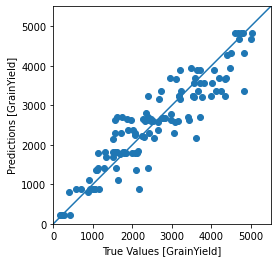

In [53]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_13w_X,train_13w_y)
y_pred_13w_rfr = rf_model.predict(test_scaler_13w_X)
modelEvaluation(test_13w_y, y_pred_13w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataSoy13w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

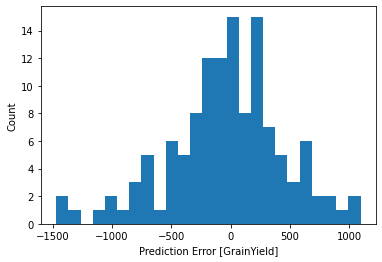

In [54]:
errorPlot(test_13w_y, y_pred_13w_rfr)

Mean absolute error regression loss (Best is 0) = 362.67927
Mean squared error (Best is 0) = 230401.53603
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 261.09448
Coefficient of determination (Best is 1) = 0.82867
minTemp12    0.465739
maxTemp7     0.106687
minTemp5     0.091034
Precip10     0.046472
minTemp1     0.027410
dtype: float64


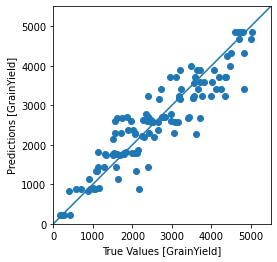

In [55]:
max_depth = 25
n_est = 400
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_13w_X,train_13w_y)
y_pred_13w_rfrc = rf_model.predict(test_scaler_13w_X)
modelEvaluation(test_13w_y, y_pred_13w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataSoy13w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

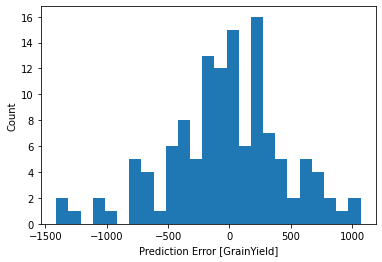

In [56]:
errorPlot(test_13w_y, y_pred_13w_rfrc)

**Neural Network**

***Build the model***

Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_13w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               12032     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 16)               

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [61]:
EPOCHS = 200
history = model.fit(train_scaler_13w_X, train_13w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8574121.0000,  mae:2701.4297,  mse:8574121.0000,  val_loss:7512674.0000,  val_mae:2556.5022,  val_mse:7512674.0000,  
....................................................................................................
Epoch: 100, loss:207037.6719,  mae:347.5275,  mse:207037.6719,  val_loss:333959.7188,  val_mae:466.4726,  val_mse:333959.7188,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

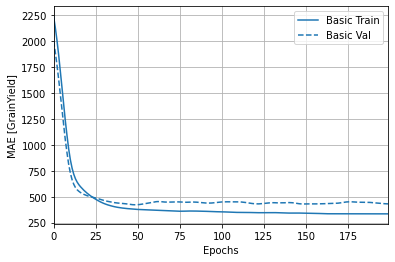

In [63]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

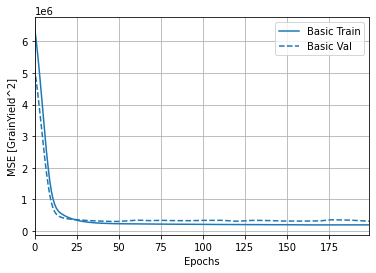

In [64]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [65]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
early_history = model.fit(train_scaler_13w_X, train_13w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8620726.0000,  mae:2707.8457,  mse:8620726.0000,  val_loss:7671077.5000,  val_mae:2580.8506,  val_mse:7671077.5000,  
................................................................................................

In [66]:
loss, mae, mse = model.evaluate(test_scaler_13w_X, test_13w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

4/4 - 0s - loss: 251867.5000 - mae: 383.3354 - mse: 251867.5000
Testing set Mean Abs Error: 383.34 GrainYield


Mean absolute error regression loss (Best is 0) = 383.33542
Mean squared error (Best is 0) = 251867.50269
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 295.98486
Coefficient of determination (Best is 1) = 0.79808


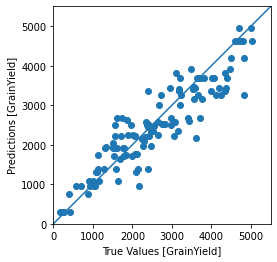

In [67]:
y_pred_13w_nn = model.predict(test_scaler_13w_X).flatten()
modelEvaluation(test_13w_y, y_pred_13w_nn)

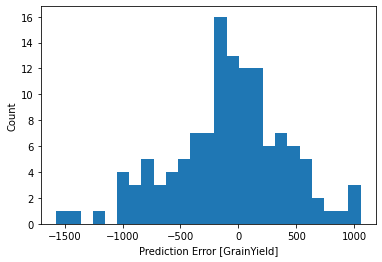

In [68]:
errorPlot(test_13w_y, y_pred_13w_nn)

# Soybean - 12 weeks

In [69]:
dataSoy12w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/soyFeatures12w.csv')
corrSoy12w = dataSoy12w.corr()
corrSoy12w.style.background_gradient(cmap='coolwarm').set_precision(2)

In [0]:
# Splitting data set
train_12w_X, test_12w_X = train_test_split(dataSoy12w.drop('GrainYield', axis=1), random_state=1)
train_12w_y, test_12w_y = train_test_split(dataSoy12w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_12w_X = scaler.fit_transform(train_12w_X)
test_scaler_12w_X = scaler.transform(test_12w_X)

**Lasso**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24385210.9189792, tolerance: 46442.09510619733
  positive)


Mean absolute error regression loss (Best is 0) = 387.07049
Mean squared error (Best is 0) = 249863.13617
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 297.82594
Coefficient of determination (Best is 1) = 0.80409
minTemp11    1041.287710
minTemp5      923.538454
minHum9       807.744655
minHum2       792.117556
minHum12      592.106292
dtype: float64
minTemp9    -378.128089
minTemp4    -397.242281
minHum8     -540.091014
maxHum1     -654.377138
minHum5    -1264.604946
dtype: float64


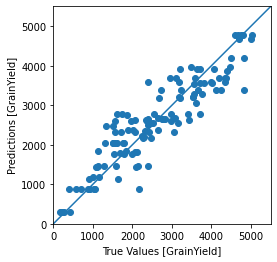

In [71]:
lm = linear_model.Lasso(alpha=0.7)
lm.fit(train_scaler_12w_X,train_12w_y)
y_pred_12w_lm = lm.predict(test_scaler_12w_X)
modelEvaluation(test_12w_y, y_pred_12w_lm)

important_features = pd.Series(data=lm.coef_,index=dataSoy12w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

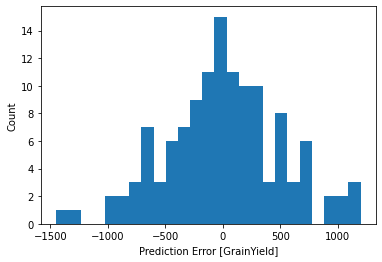

In [72]:
errorPlot(test_12w_y, y_pred_12w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 361.58738
Mean squared error (Best is 0) = 225529.12061
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 262.75000
Coefficient of determination (Best is 1) = 0.83244
minTemp11    1041.287710
minTemp5      923.538454
minHum9       807.744655
minHum2       792.117556
minHum12      592.106292
dtype: float64
minTemp9    -378.128089
minTemp4    -397.242281
minHum8     -540.091014
maxHum1     -654.377138
minHum5    -1264.604946
dtype: float64


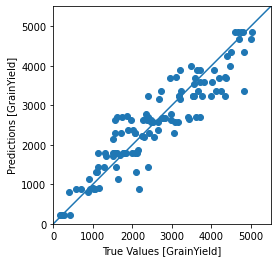

In [73]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_12w_X,train_12w_y)
y_pred_12w_dtr = tree_model.predict(test_scaler_12w_X)
modelEvaluation(test_12w_y, y_pred_12w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataSoy12w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

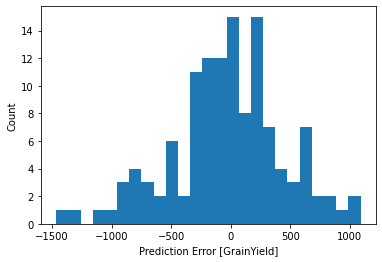

In [74]:
errorPlot(test_12w_y, y_pred_12w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 363.07672
Mean squared error (Best is 0) = 231579.52388
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 246.76349
Coefficient of determination (Best is 1) = 0.82647
minTemp12    0.471845
maxTemp7     0.110616
minTemp5     0.106498
Precip10     0.038249
minTemp1     0.027174
dtype: float64


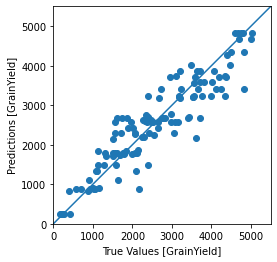

In [75]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_12w_X,train_12w_y)
y_pred_12w_rfr = rf_model.predict(test_scaler_12w_X)
modelEvaluation(test_12w_y, y_pred_12w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataSoy12w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

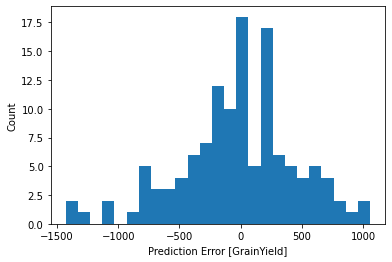

In [76]:
errorPlot(test_12w_y, y_pred_12w_rfr)

Mean absolute error regression loss (Best is 0) = 363.25883
Mean squared error (Best is 0) = 231873.55240
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 261.09448
Coefficient of determination (Best is 1) = 0.82766
minTemp12    0.466620
minTemp5     0.108979
maxTemp7     0.102705
Precip10     0.045317
minTemp1     0.027735
dtype: float64


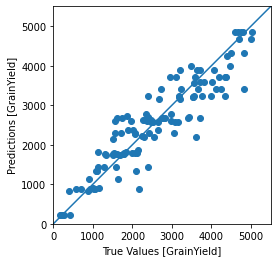

In [77]:
max_depth = 25
n_est = 400
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_12w_X,train_12w_y)
y_pred_12w_rfrc = rf_model.predict(test_scaler_12w_X)
modelEvaluation(test_12w_y, y_pred_12w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataSoy12w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

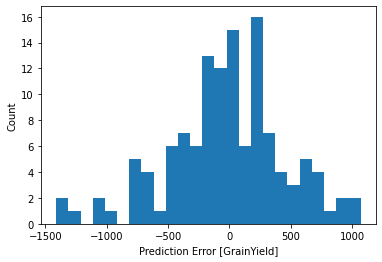

In [78]:
errorPlot(test_12w_y, y_pred_12w_rfrc)

**Neural Network**

***Build the model***

Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_12w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [81]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               11136     
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 16)               

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [82]:
EPOCHS = 200
history = model.fit(train_scaler_12w_X, train_12w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8624242.0000,  mae:2708.3914,  mse:8624242.0000,  val_loss:7707157.5000,  val_mae:2586.3140,  val_mse:7707157.5000,  
....................................................................................................
Epoch: 100, loss:201659.7031,  mae:350.0472,  mse:201659.7031,  val_loss:288827.5000,  val_mae:423.6794,  val_mse:288827.5000,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

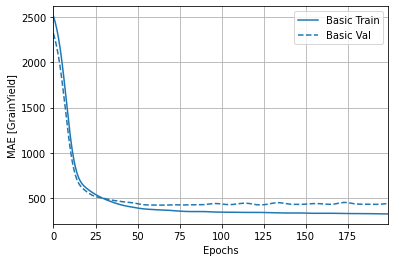

In [84]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

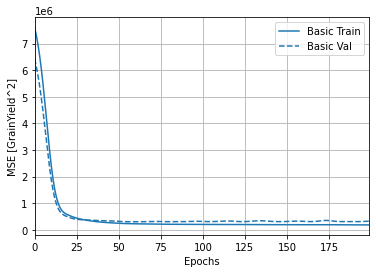

In [85]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [86]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
early_history = model.fit(train_scaler_12w_X, train_12w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8613570.0000,  mae:2706.7649,  mse:8613570.0000,  val_loss:7639281.5000,  val_mae:2575.8591,  val_mse:7639281.5000,  
...............................................................................................

In [87]:
loss, mae, mse = model.evaluate(test_scaler_12w_X, test_12w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

4/4 - 0s - loss: 291563.7812 - mae: 419.3576 - mse: 291563.7812
Testing set Mean Abs Error: 419.36 GrainYield


Mean absolute error regression loss (Best is 0) = 419.35765
Mean squared error (Best is 0) = 291563.76853
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 343.00618
Coefficient of determination (Best is 1) = 0.73922


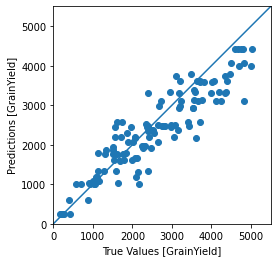

In [88]:
y_pred_12w_nn = model.predict(test_scaler_12w_X).flatten()
modelEvaluation(test_12w_y, y_pred_12w_nn)

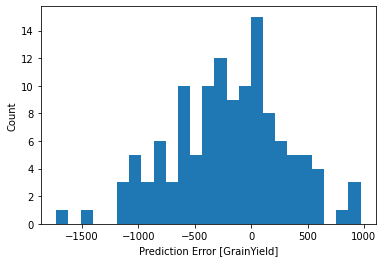

In [89]:
errorPlot(test_12w_y, y_pred_12w_nn)

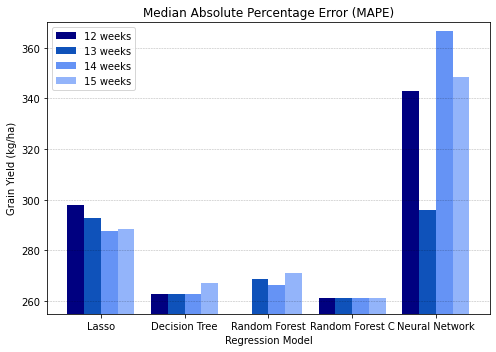

In [92]:
data = np.array([[median_absolute_error(test_12w_y, y_pred_12w_lm), median_absolute_error(test_13w_y, y_pred_13w_lm), median_absolute_error(test_14w_y, y_pred_14w_lm), median_absolute_error(test_15w_y, y_pred_15w_lm)],
                 [median_absolute_error(test_12w_y, y_pred_12w_dtr), median_absolute_error(test_13w_y, y_pred_13w_dtr), median_absolute_error(test_14w_y, y_pred_14w_dtr), median_absolute_error(test_15w_y, y_pred_15w_dtr)],
                 [median_absolute_error(test_12w_y, y_pred_12w_rfr), median_absolute_error(test_13w_y, y_pred_13w_rfr), median_absolute_error(test_14w_y, y_pred_14w_rfr), median_absolute_error(test_15w_y, y_pred_15w_rfr)],
                 [median_absolute_error(test_12w_y, y_pred_12w_rfrc), median_absolute_error(test_13w_y, y_pred_13w_rfrc), median_absolute_error(test_14w_y, y_pred_14w_rfrc), median_absolute_error(test_15w_y, y_pred_15w_rfrc)],
                 [median_absolute_error(test_12w_y, y_pred_12w_nn), median_absolute_error(test_13w_y, y_pred_13w_nn), median_absolute_error(test_14w_y, y_pred_14w_nn), median_absolute_error(test_15w_y, y_pred_15w_nn)]])
length = len(data)
x_labels = ['Lasso', 'Decision Tree', 'Random Forest', 'Random Forest C', 'Neural Network']

# Set plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(7,5)

width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='#000080', label='12 weeks')
ax.bar(x + width, data[:,1], width, color='#0F52BA', label='13 weeks')
ax.bar(x + (2 * width), data[:,2], width, color='#6593F5', label='14 weeks')
ax.bar(x + (3 * width), data[:,3], width, color='#93b4fa', label='15 weeks')

ax.set_ylim(255,370)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Grain Yield (kg/ha)')
ax.set_xlabel('Regression Model')
ax.set_title('Median Absolute Percentage Error (MAPE)')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

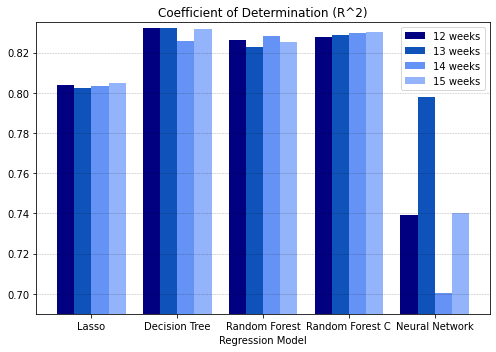

In [95]:
data = np.array([[r2_score(y_pred_12w_lm, test_12w_y), r2_score(y_pred_13w_lm, test_13w_y), r2_score(y_pred_14w_lm, test_14w_y), r2_score(y_pred_15w_lm, test_15w_y)],
                 [r2_score(y_pred_12w_dtr, test_12w_y), r2_score(y_pred_13w_dtr, test_13w_y), r2_score(y_pred_14w_dtr, test_14w_y), r2_score(y_pred_15w_dtr, test_15w_y)],
                 [r2_score(y_pred_12w_rfr, test_12w_y), r2_score(y_pred_13w_rfr, test_13w_y), r2_score(y_pred_14w_rfr, test_14w_y), r2_score(y_pred_15w_rfr, test_15w_y)],
                 [r2_score(y_pred_12w_rfrc, test_12w_y), r2_score(y_pred_13w_rfrc, test_13w_y), r2_score(y_pred_14w_rfrc, test_14w_y), r2_score(y_pred_15w_rfrc, test_15w_y)],
                 [r2_score(y_pred_12w_nn, test_12w_y), r2_score(y_pred_13w_nn, test_13w_y), r2_score(y_pred_14w_nn, test_14w_y), r2_score(y_pred_15w_nn, test_15w_y)]])
#r2_score(y_pred, test_y)
length = len(data)
x_labels = ['Lasso', 'Decision Tree', 'Random Forest', 'Random Forest C', 'Neural Network']

# Set plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='#000080', label='12 weeks')
ax.bar(x + width, data[:,1], width, color='#0F52BA', label='13 weeks')
ax.bar(x + (2 * width), data[:,2], width, color='#6593F5', label='14 weeks')
ax.bar(x + (3 * width), data[:,3], width, color='#93b4fa', label='15 weeks')


ax.set_ylim(0.69,0.835)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Regression Model')
ax.set_title('Coefficient of Determination (R^2)')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()